# **Data cleaning and sorting**
This notebook covers a summary come detailed analysis of the contents of the text (.tsv) country files generated from [01.Data_downloading_and_transformation](./01.Data_downloading_and_transformation.ipnb)
## **Goals**
1. To Understand the summary contents of the .tsv files
2. To Analyse the outlook of each sequence: length and content

### **Install tidyverse package**

In [ ]:
install.packages("tidyverse")

### **loading dplyr or magrittr packages**

In [1]:
getwd()

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/code"

In [2]:
library(dplyr);library(magrittr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
suppressMessages(library(dplyr));suppressMessages(library(magrittr))

### **Loading the .tsv data file to R**

In [4]:
bold_data = read.delim("../data/input/input_data/clean_africa/enafroCOI_all_data_raw.tsv", stringsAsFactors = F, header = T, na.strings = "") 
# seems to work ok. bold2.tsv does not contain any '\r' characters

### **The Overall look of the data**

In [5]:
str(bold_data)

'data.frame':	279205 obs. of  80 variables:
 $ processid                 : chr  "ANGBF10860-15" "ANGBF10861-15" "ANGBF10862-15" "ANGBF10863-15" ...
 $ sampleid                  : chr  "KM819813" "KM819812" "KM819811" "KM819810" ...
 $ recordID                  : num  5651907 5651908 5651909 5651910 5651911 ...
 $ catalognum                : chr  NA NA NA NA ...
 $ fieldnum                  : chr  "KM819813" "KM819812" "KM819811" "KM819810" ...
 $ institution_storing       : chr  "Mined from GenBank, NCBI" "Mined from GenBank, NCBI" "Mined from GenBank, NCBI" "Mined from GenBank, NCBI" ...
 $ collection_code           : int  NA NA NA NA NA NA NA NA NA NA ...
 $ bin_uri                   : chr  "BOLD:AAA1548" "BOLD:AAA1548" "BOLD:AAA1548" "BOLD:AAA1548" ...
 $ phylum_taxID              : int  18 18 18 18 18 18 18 18 18 18 ...
 $ phylum_name               : chr  "Chordata" "Chordata" "Chordata" "Chordata" ...
 $ class_taxID               : int  34196 34196 34196 34196 34196 34196 34196 34

### **Countries represented**
Note: Countries include; Atlantic Ocean(137), Costa Rica(1291), Indian Ocean(3), India(1), Israel(27) and United States(2) = 1461 in total

In [6]:
cat(length(unique(bold_data$country)), "countries are represented in bold_data: ")
cat(c(unique(bold_data$country)), sep=";")
as.data.frame(table(c(bold_data$country)))

62 countries are represented in bold_data: Algeria;NA;Angola;Atlantic Ocean;Benin;Botswana;Burkina Faso;Burundi;Cameroon;Cape Verde;Central African Republic;Chad;Comoros;Cote d'Ivoire;Democratic Republic of the Congo;Djibouti;Egypt;Israel;Equatorial Guinea;Eritrea;Ethiopia;Gabon;Gambia;Ghana;Guinea-Bissau;Guinea;Kenya;Lesotho;South Africa;Costa Rica;Liberia;Libya;Madagascar;Malawi;Mali;Mauritania;Mauritius;Morocco;United States;Mozambique;Indian Ocean;Namibia;Nigeria;Niger;Republic of the Congo;Reunion;Rwanda;Sao Tome and Principe;Senegal;Seychelles;India;Sierra Leone;Somalia;South Sudan;Sudan;Swaziland;Tanzania;Togo;Tunisia;Uganda;Zambia;Zimbabwe

Var1,Freq
<fct>,<int>
Algeria,1142
Angola,1327
Atlantic Ocean,137
Benin,940
Botswana,668
Burkina Faso,300
Burundi,256
Cameroon,7266
Cape Verde,689


## **Loading sample data from exclusively East Africa:**
1. Kenya, 
2. Tanzania, 
3. Uganda, 
4. Rwanda, 
5. Burundi, 
6. South Sudan and 
7. Ethiopia

### **Looking at the summary of the sample_dataframe.**

In [7]:
sample_data = read.delim("../data/input/test_data/bold.tsv", stringsAsFactors = F, header = T, na.strings = "") 
str(sample_data)

'data.frame':	41238 obs. of  80 variables:
 $ processid                 : chr  "ACRJP031-09" "ACRJP194-09" "ACRJP221-09" "ACRJP419-10" ...
 $ sampleid                  : chr  "BC-MNHNJP0313" "BC-MNHNJP0536" "BC-MNHNJP0563" "BC-MNHNJP0856" ...
 $ recordID                  : int  1134352 1134515 1134542 1608687 1608835 2496776 2506330 2506373 2506395 2508075 ...
 $ catalognum                : chr  NA NA NA NA ...
 $ fieldnum                  : chr  "BC-MNHNJP0313" "BC-MNHNJP0536" "BC-MNHNJP0563" "BC-MNHNJP0856" ...
 $ institution_storing       : chr  "Research Collection of Dominique Bernaud" "Museum National d'Histoire Naturelle, Paris" "Museum National d'Histoire Naturelle, Paris" "Research Collection of Dominique Bernaud" ...
 $ collection_code           : logi  NA NA NA NA NA NA ...
 $ bin_uri                   : chr  "BOLD:AAC9562" "BOLD:AAE8435" "BOLD:AAD8963" "BOLD:AAE0506" ...
 $ phylum_taxID              : int  20 20 20 20 20 20 20 20 20 20 ...
 $ phylum_name               : chr

In [70]:
cat(unique((bold_data$collectors[grep("Copeland", bold_data$collectors)])),sep=" | ")
as.data.frame(table(c(bold_data$collectors[grep("Copeland", bold_data$collectors)])))
as.data.frame(table(c(bold_data$collectors)))
#cop_data <- bold_data[!!(bold_data$collectors %in% c(paste(unique(bold_data$collectors[grep("Copeland", bold_data$collectors)]),sep="\" , \""))), ]
cop_data <- subset(bold_data, subset = collectors %in% c(paste(unique(bold_data$collectors[grep("Copeland", bold_data$collectors)]),sep="\" , \"")))
#c(cat(unique(bold_data$collectors[grep("Copeland", bold_data$collectors)]),sep="\" , \""))
#str(cop_data)
nrow(cop_data)
as.data.frame(table(c(cop_data$marker_codes)))
as.data.frame(table(c(cop_data$order_name)))
#as.data.frame(table(c(cop_data$lat)))
nrow(subset(cop_data, !is.na(lat) & marker_codes == "COI-5P" & !is.na(genus_name)))
as.data.frame(table(c((subset(cop_data, !is.na(lat) & marker_codes == "COI-5P" & !is.na(genus_name)))$order_name)))

R.Copeland | RS Copeland | R. Copeland | R.S. Copeland | R Copeland | R.S.Copeland | R. S. Copeland | Robert Copeland | J. Bukhebi & RS Copeland | R S Copeland | J.Bukhebi & R S Copeland | R S.Copeland | RS  Copeland | R.S Copeland | J.Bukhebi & R.S Copeland | J.Bukhebi & RS Copeland | Bob Copeland

Var1,Freq
<fct>,<int>
Bob Copeland,10
J. Bukhebi & RS Copeland,895
J.Bukhebi & R S Copeland,41
J.Bukhebi & R.S Copeland,16
J.Bukhebi & RS Copeland,83
R Copeland,35
R S Copeland,196
R S.Copeland,19
R. Copeland,526


Var1,Freq
<fct>,<int>
. Onbekend,9
0,1
0G 1984GR00402,1
2016 Allendale Class,41
2rd year UKZN students,12
989 m,1
A Barbet,1
A Bok,1
A Eicker,1


[1] 7033

Var1,Freq
<fct>,<int>
COI-5P,6795


Var1,Freq
<fct>,<int>
Araneae,2
Blattodea,39
Coleoptera,1034
Diptera,2154
Hemiptera,524
Hymenoptera,1558
Lepidoptera,1612
Mantodea,2
Neuroptera,16


[1] 718

Var1,Freq
<fct>,<int>
Diptera,21
Hymenoptera,27
Lepidoptera,670


In [8]:
cat(length(unique(sample_data$markercode)),"markers are represented in the East African data set")
#unique(sample_data$markercode) # filtering rows corresponding to COI-5P markers
as.data.frame(table(c(sample_data$markercode)))

22 markers are represented in the East African data set

Var1,Freq
<fct>,<int>
12S,9
16S,16
18S,3
28S,465
28S-D2,10
28S-D2-D3,3
AATS,1
ARK,1
CAD,2


### **Phyla represented in the bold data**
Despite our focus on arthropoda phylum, additional records from 38 phyla were downloaded

In [9]:
cat(length(unique(bold_data$phylum_name)), "phyla are represented in bold_data: ")
as.data.frame(table(c(bold_data$phylum_name)))
cat(length(unique(sample_data$phylum_name)), "phyla are represented in East African data: ")
as.data.frame(table(c(sample_data$phylum_name)))

39 phyla are represented in bold_data: 

Var1,Freq
<fct>,<int>
Acanthocephala,1
Actinobacteria,70
Algeria,70
Annelida,2165
Apicomplexa,618
Arthropoda,213197
Ascomycota,1662
Basidiomycota,386
Bryophyta,130


1 phyla are represented in East African data: 

Var1,Freq
<fct>,<int>
Arthropoda,41238


### **Focusing on arthropoda phylum**
**1. Number of records from African Countries**

In [10]:
arthropoda_data1 = subset(bold_data, phylum_name == "Arthropoda")
cat("bold_data have", nrow(arthropoda_data1), "arthropoda records out of", nrow(bold_data), "records in the raw bold_data")
arthropoda_data = subset(bold_data, phylum_name == "Arthropoda" & country != "United States")
cat("\nbold_data have", nrow(arthropoda_data), "arthropoda records out of", nrow(bold_data), "records in the raw African bold data")
arthropoda_data -> bold_dataframe
sample_dataframe = subset(sample_data, phylum_name == "Arthropoda")

bold_data have 213197 arthropoda records out of 279205 records in the raw bold_data
bold_data have 213195 arthropoda records out of 279205 records in the raw African bold data

**2. Here are the African countries represented in the athropod data**

In [11]:
cat(length(unique(bold_dataframe$country)), "countries are represented in bold_dataframe: ")
#cat(c(unique(bold_dataframe$country)), sep=";")
as.data.frame(table(c(bold_dataframe$country)))

56 countries are represented in bold_dataframe: 

Var1,Freq
<fct>,<int>
Algeria,785
Angola,426
Benin,861
Botswana,134
Burkina Faso,229
Burundi,225
Cameroon,5591
Cape Verde,167
Central African Republic,3105


### **What looks interesting?**
#### **1.Taxonomy**
**Taking a deeper look at the taxa variables: phylum,class,order and family**

In [12]:
unique(bold_dataframe$phylum_name)

[1] "Arthropoda"

### **classes represented in the bold_dataframe**

In [13]:
cat("African arthropod data is distrubed in taxa classes as follows:")
as.data.frame(table(c(bold_dataframe$class_name)))
cat("East African arthropod data is distrubed in taxa classes as follows:")
as.data.frame(table(c(sample_dataframe$class_name)))

African arthropod data is distrubed in taxa classes as follows:

Var1,Freq
<fct>,<int>
Arachnida,4053
Branchiopoda,58
Chilopoda,27
Collembola,2631
Diplopoda,60
Diplura,3
Hexanauplia,177
Insecta,202654
Malacostraca,1575


East African arthropod data is distrubed in taxa classes as follows:

Var1,Freq
<fct>,<int>
Arachnida,381
Branchiopoda,9
Diplopoda,5
Insecta,40499
Malacostraca,308
Ostracoda,1


#### **orders represented**

In [14]:
cat(length(unique(bold_dataframe$order_name)), "orders are indicated in African arthropod data: ")
cat(unique(bold_dataframe$order_name),sep=";","\n\n")
cat(length(unique(sample_dataframe$order_name)), "orders are indicated in East African arthropod data: ")
cat(unique(sample_dataframe$order_name),sep=";")

61 orders are indicated in African arthropod data: Poduromorpha;Entomobryomorpha;Scorpiones;Hymenoptera;Lepidoptera;Araneae;Neelipleona;Symphypleona;Coleoptera;Ixodida;Decapoda;Isopoda;Calanoida;Psocodea;Diptera;Hemiptera;Orthoptera;Odonata;Thysanoptera;Mantodea;NA;Pseudoscorpiones;Dermaptera;Blattodea;Scalpelliformes;Tanaidacea;Sessilia;Trichoptera;Zygentoma;Embioptera;Anostraca;Neuroptera;Siphonaptera;Trombidiformes;Mesostigmata;Sarcoptiformes;Diplostraca;Ephemeroptera;Stomatopoda;Spirostreptida;Polyxenida;Plecoptera;Phasmatodea;Sphaerotheriida;Lithobiomorpha;Scolopendromorpha;Amphipoda;Pantopoda;Notostraca;Podocopida;Bathynellacea;Scutigeromorpha;Mysida;Solifugae;Euphausiacea;Siphonostomatoida;Opiliones;Strepsiptera;Amblypygi;Mecoptera;Geophilomorpha;

32 orders are indicated in East African arthropod data: Lepidoptera;Hymenoptera;Orthoptera;Hemiptera;Diptera;Coleoptera;Neuroptera;Blattodea;Odonata;Ephemeroptera;Ixodida;Thysanoptera;Mesostigmata;Decapoda;Dermaptera;Pseudoscorpiones;

#### **Families represented**

In [15]:
cat(length(unique(bold_dataframe$family_name)), "families are indicated in the African Data: ")
cat(unique(bold_dataframe$family_name),sep=";","\n\n")
cat(length(unique(sample_dataframe$family_name)), "families are indicated in the East African Data: ")
cat(unique(sample_dataframe$family_name),sep=";")

562 families are indicated in the African Data: Neanuridae;NA;Buthidae;Apidae;Nymphalidae;Sparassidae;Braconidae;Isotomidae;Ixodidae;Hesperiidae;Epialtidae;Asellidae;Paracalanidae;Acartiidae;Pediculidae;Psychodidae;Ceratopogonidae;Lycaenidae;Pieridae;Aleyrodidae;Aphididae;Cynipidae;Culicidae;Pentatomidae;Acrididae;Formicidae;Aeshnidae;Thripidae;Geometridae;Pseudococcidae;Notodontidae;Erebidae;Sphingidae;Papilionidae;Crambidae;Halictidae;Brahmaeidae;Platycnemididae;Libellulidae;Coenagrionidae;Gomphidae;Saturniidae;Zodariidae;Cerambycidae;Tenebrionidae;Laemophloeidae;Ichneumonidae;Tenthredinidae;Vespidae;Tephritidae;Calliphoridae;Drosophilidae;Pyralidae;Coccidae;Simuliidae;Gracillariidae;Asilidae;Evaniidae;Atemnidae;Dermestidae;Histeridae;Glossinidae;Araneidae;Lasiocampidae;Stratiomyidae;Sarcophagidae;Eupterotidae;Pholcidae;Carabidae;Cheliferidae;Curculionidae;Phoridae;Belostomatidae;Figitidae;Uraniidae;Himantopteridae;Tortricidae;Hybosoridae;Chlorocyphidae;Calopterygidae;Pentaphlebiidae

### **genera and species names featured**

In [16]:
#genera
cat(length(unique(bold_dataframe$genus_name)), "genus_names")
#species
cat(" and ", length(unique(bold_dataframe$species_name)), "species_names are featured in the African arthropod data set\n\n")
#genera
cat(length(unique(sample_dataframe$genus_name)), "genus_names")
#species
cat(" and ", length(unique(sample_dataframe$species_name)), "species_names are featured in the East African arthropod data set")

3374 genus_names and  9829 species_names are featured in the African arthropod data set

974 genus_names and  2637 species_names are featured in the East African arthropod data set

### **Identify the container projects from which the data sets come from. Try using the copyright\***

In [17]:
cat(length(unique(bold_dataframe$copyright_institution)),"copyright institutions are featured in the African arthropod data set\n")
#output a list with so many missing values, **NOT IDEAL** for use.
cat(length(unique(sample_dataframe$copyright_institution)),"copyright institutions are featured in the East African arthropod data set ")

79 copyright institutions are featured in the African arthropod data set
49 copyright institutions are featured in the East African arthropod data set 

In [18]:
cat(length(unique(bold_dataframe$copyright_holders)),"copyright holders are featured in the African arthropod data set\n")
#output with so many missing values "NA"
cat(length(unique(sample_dataframe$copyright_holders)),"copyright holders are featured in the East African arthropod data set")

110 copyright holders are featured in the African arthropod data set
57 copyright holders are featured in the East African arthropod data set

### **Taking a look at the markercode field.**

In [19]:
cat(length(unique(bold_dataframe$markercode)),"markers are represented in the African data set")
as.data.frame(table(c(bold_dataframe$markercode)))
#unique(bold_dataframe$markercode) # filtering rows corresponding to COI-5P markers
cat(length(unique(sample_dataframe$markercode)),"markers are represented in the East African data set")
as.data.frame(table(c(sample_dataframe$markercode)))
#unique(sample_dataframe$markercode) # filtering rows corresponding to COI-5P markers

26 markers are represented in the African data set

Var1,Freq
<fct>,<int>
12S,127
16S,59
18S,36
18S-V4,11
28S,371
28S-D2,181
28S-D2-D3,16
AATS,1
ARK,1


22 markers are represented in the East African data set

Var1,Freq
<fct>,<int>
12S,9
16S,16
18S,3
28S,465
28S-D2,10
28S-D2-D3,3
AATS,1
ARK,1
CAD,2


#### **Genebank_accession numbers**

In [20]:
cat("There are ",length(unique(bold_dataframe$genbank_accession)), "genbank accession numbers in the African arthropod records out of ",nrow(bold_dataframe),"records.\n")
cat("There are ",length(unique(sample_dataframe$genbank_accession)), "genbank accession numbers in the East African arthropod records out of ",nrow(sample_dataframe),"records.")

There are  52375 genbank accession numbers in the African arthropod records out of  213195 records.
There are  11321 genbank accession numbers in the East African arthropod records out of  41238 records.

#### **Cleaning up the dataset to remain only with COI-5P sequences**

**1. Removing sequences from other classes and markers beside Insecta and COI-5P**

In [23]:
COI_Insect_Afrodata = subset(bold_dataframe, class_name == "Insecta" & markercode == "COI-5P" & !is.na(nucleotides) )
cat("African data set has", nrow(COI_Insect_Afrodata), "Insecta records out of", nrow(bold_dataframe), "African arthropod records\n\n")
COI_Insect_EAfrodata = subset(sample_dataframe, markercode == "COI-5P" & !is.na(nucleotides) & class_name == "Insecta")
cat("Insect COI-5P marker sequences are ",nrow(COI_Insect_EAfrodata)," out of ", nrow(sample_dataframe), "sequences in the East African bold data")

African data set has 192852 Insecta records out of 213195 African arthropod records

Insect COI-5P marker sequences are  39071  out of  41238 sequences in the East African bold data

In [24]:
nonInsecta_data = subset(bold_dataframe, class_name != "Insecta")
cat (nrow(nonInsecta_data), "records in non-insecta classes \nclasses: ",unique(nonInsecta_data$class_name))
as.data.frame(table(c((nonInsecta_data)$class_name)))
cat("The order taxa represented in Arachnida class are:")
as.data.frame(table(c((subset(bold_dataframe, class_name == "Arachnida"))$order_name)))
cat("\n",nrow(subset(bold_dataframe, class_name == "Malacostraca")), "Malacostraca: orders;",unique((subset(bold_dataframe, class_name == "Malacostraca")$order_name)))
cat("\n",nrow(subset(bold_dataframe, class_name == "Diplopoda")), "Diplopoda: orders;",unique((subset(bold_dataframe, class_name == "Diplopoda")$order_name)))
cat("\n",nrow(subset(bold_dataframe, class_name == "Branchiopoda")), "Branchiopoda: orders;",unique((subset(bold_dataframe, class_name == "Branchiopoda")$order_name)))
cat("\n",nrow(subset(bold_dataframe, class_name == "Ostracoda")), "Ostracoda: orders;",unique((subset(bold_dataframe, class_name == "Ostracoda")$order_name)))

8655 records in non-insecta classes 
classes:  Collembola Arachnida Malacostraca Hexanauplia Branchiopoda Diplopoda Chilopoda Pycnogonida Ostracoda Diplura

Var1,Freq
<fct>,<int>
Arachnida,4053
Branchiopoda,58
Chilopoda,27
Collembola,2631
Diplopoda,60
Diplura,3
Hexanauplia,177
Malacostraca,1575
Ostracoda,70


The order taxa represented in Arachnida class are:

Var1,Freq
<fct>,<int>
Amblypygi,23
Araneae,2433
Ixodida,343
Mesostigmata,283
Opiliones,123
Pseudoscorpiones,228
Sarcoptiformes,31
Scorpiones,331
Solifugae,3



 1575 Malacostraca: orders; Decapoda Isopoda Tanaidacea Stomatopoda Amphipoda NA Bathynellacea Mysida Euphausiacea
 60 Diplopoda: orders; Spirostreptida Polyxenida Sphaerotheriida NA
 58 Branchiopoda: orders; Anostraca Diplostraca Notostraca
 70 Ostracoda: orders; Podocopida

## **Focusing on our Sample data(East African data set)**
#### **Analysing nucleotide sequences (nucleotides)**

In [25]:
typeof(COI_Insect_EAfrodata$nucleotides)

[1] "character"

**1. Introducing a field "seqlen1" that has the number of nucleotides in the COI-5P**

In [26]:
COI_Insect_EAfrodata %>% mutate(seqlen1 = nchar(nucleotides)) -> resulting_dataframe1 ## ""%>%"" is same as pipe "|" in bash

**2. List all characters present in the nucleotide sequences**

In [27]:
unique(unlist(strsplit(COI_data$nucleotides, "", fixed = TRUE)), incomparables = FALSE)

ERROR: Error in strsplit(COI_data$nucleotides, "", fixed = TRUE): object 'COI_data' not found


**3. Number of nucleotide sequences with '-' characters* in them**

In [93]:
length(grep( '-',resulting_dataframe1$nucleotides, value= TRUE))

[1] 12545

**4. REMOVING '-' characters from nucleotide sequences and creating a field of unalinged nucleotide sequences (unalined_nucleotides)**

In [94]:
resulting_dataframe1 %>% mutate(unaligned_nucleotides = gsub('-', '', resulting_dataframe1$nucleotides, ignore.case = FALSE, perl = FALSE,
     fixed = FALSE, useBytes = FALSE)) -> resulting_dataframe2

In [95]:
#Number of nucleotide sequences with '-' characters* in them after removal
length(grep( '-',resulting_dataframe2$unaligned_nucleotides, value= TRUE))

[1] 0

**5. Introducing a field seqlen2 with number nucleotides in unaligned_nucleotides field**

In [96]:
resulting_dataframe2 %>% mutate(seqlen2 = nchar(unaligned_nucleotides)) -> resulting_dataframe3

In [97]:
str(resulting_dataframe3)

'data.frame':	38090 obs. of  83 variables:
 $ processid                 : chr  "AFMIC102-12" "AFMIC132-12" "AFTOR272-12" "AFTOR335-12" ...
 $ sampleid                  : chr  "USNM ENT 00194573" "USNM ENT 00808020" "USNM ENT 00676877" "USNM ENT 00193703" ...
 $ recordID                  : int  2506317 2506347 2473427 2484855 2484889 1537514 2740084 3079198 1709965 1709967 ...
 $ catalognum                : chr  "USNM ENT 00194573" "USNM ENT 00808020" "USNM ENT 00676877" "USNM ENT 00193703" ...
 $ fieldnum                  : chr  NA NA NA NA ...
 $ institution_storing       : chr  "Smithsonian Institution National Museum of Natural History" "Smithsonian Institution National Museum of Natural History" "Smithsonian Institution National Museum of Natural History" "Smithsonian Institution National Museum of Natural History" ...
 $ collection_code           : logi  NA NA NA NA NA NA ...
 $ bin_uri                   : chr  "BOLD:AAH2277" "BOLD:ABW2019" "BOLD:ABW2614" "BOLD:ABW2543" ...
 $ phy

#### **Understanding the distribution of seqlen1 versus seqlen2**

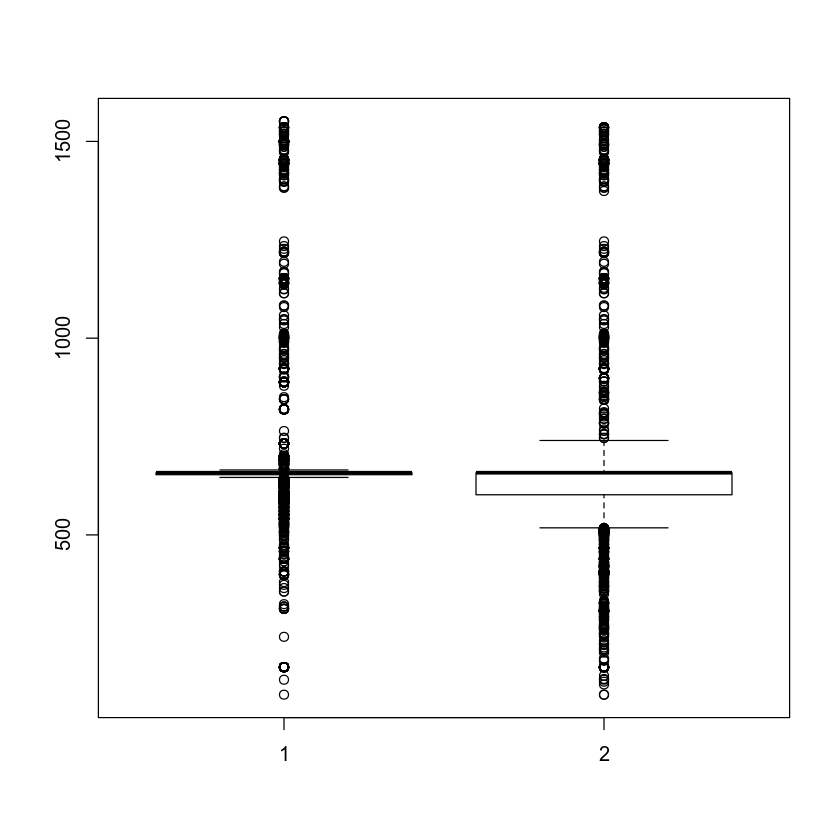

In [98]:
boxplot(resulting_dataframe1$seqlen1, resulting_dataframe3$seqlen2)

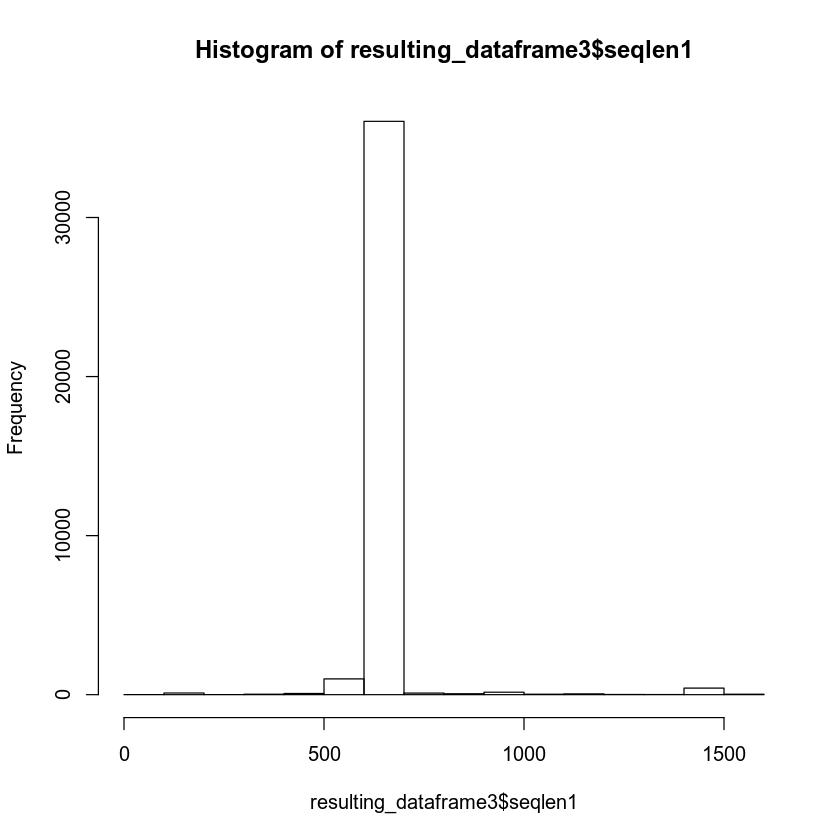

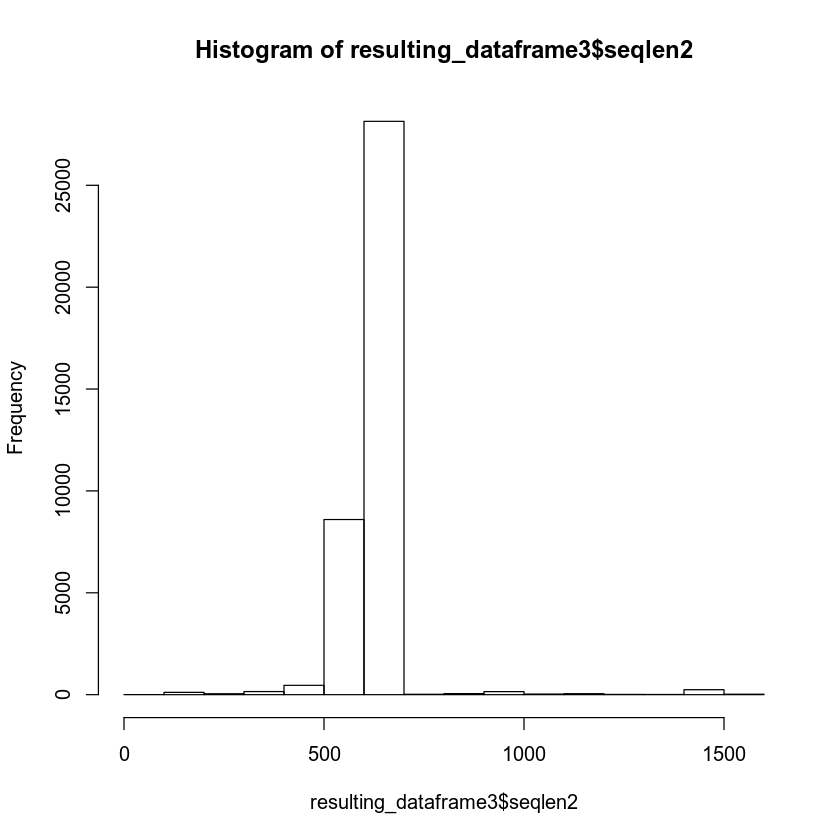

In [99]:
hist(resulting_dataframe3$seqlen1); hist(resulting_dataframe3$seqlen2)

### **Sorting the data based on the nucleotide length of sequences**

1. **Generating a file with all 'COI-5P' sequences**

In [100]:
resulting_dataframe3 -> COI_all_data; cat(length(COI_all_data$unaligned_nucleotides),"sequences have 'COI-5P' marker")

38090 sequences have 'COI-5P' marker

2. **Introducing a filter to remove sequences with less than 500 nucleotides**

In [101]:
COI_all_data %>% filter(seqlen2 >= 500 ) -> COI_Over499_data; cat(length(COI_Over499_data$unaligned_nucleotides),"sequences have more or equivalent to 500 bases")

37320 sequences have more or equivalent to 500 bases

3. **Introducing a filter to remove any sequence with less than 500 and over 700 nucleotides**

In [102]:
COI_all_data %>% filter(seqlen2 >= 500 & seqlen2 <= 700) -> COI_500to700_data; cat(length(COI_500to700_data$unaligned_nucleotides),"sequences have from 500 to 700 bases")

36736 sequences have from 500 to 700 bases

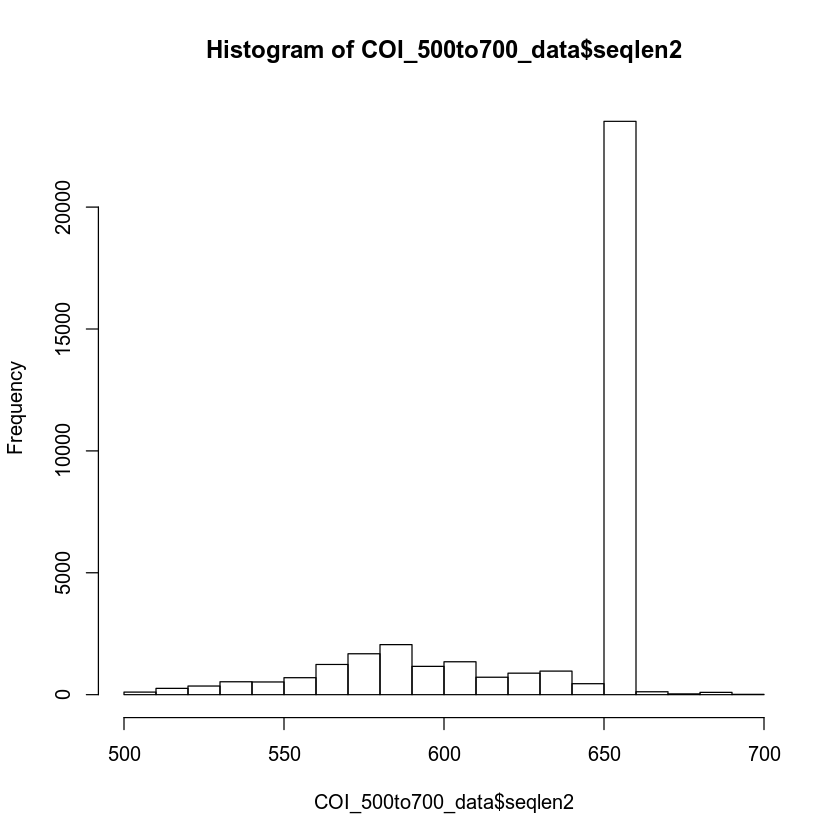

In [103]:
hist(COI_500to700_data$seqlen2)

4. **Introducing a filter to remove any sequence with less than 650 and over 660 nucleotides**

In [104]:
COI_all_data %>% filter(seqlen2 >= 650 & seqlen2 <= 660) -> COI_650to660_data; cat(length(COI_650to660_data$unaligned_nucleotides),"sequences have from 650 to 660 bases")

23554 sequences have from 650 to 660 bases

5. **Introducing a filter to remove any sequence with over 500 nucleotides**

In [105]:
COI_all_data %>% filter(seqlen2 < 500) -> COI_Under500_data; cat(length(COI_Under500_data$unaligned_nucleotides),"sequences have less than 500 bases")

770 sequences have less than 500 bases

6. **Introducing a filter to remove any sequence with less than 700 nucleotides**

In [106]:
COI_all_data %>% filter(seqlen2 > 700) -> COI_Over700_data; cat(length(COI_Over700_data$unaligned_nucleotides),"sequences have more than 700 bases")

584 sequences have more than 700 bases

### **Randomly sampling 100 sequences from data sets for use in testing the pipeline**

**1. sampling from all insecta COI-5P data irregardless of sequnce length**

In [363]:
COI_testa00_data <- COI_all_data[sample(nrow(COI_all_data), 100), ]

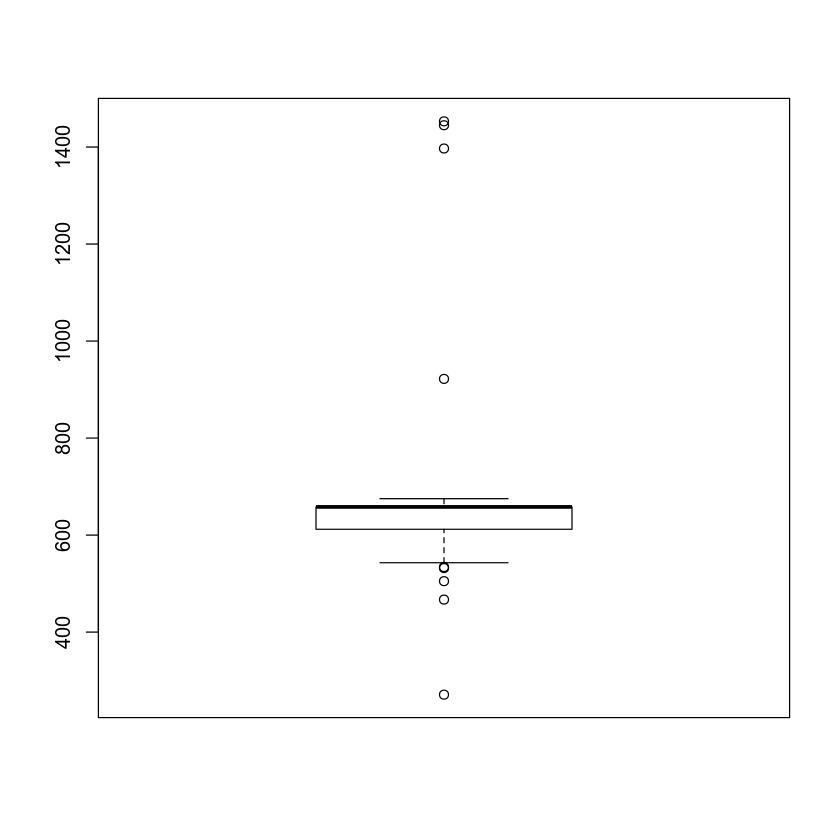

In [364]:
boxplot(COI_testa00_data$seqlen2)

**2. Sampling from insecta COI-5P data with 500 to 700 nucleotide sequence length**

In [393]:
COI_testb01_data <- COI_500to700_data[sample(nrow(COI_500to700_data), 100), ]

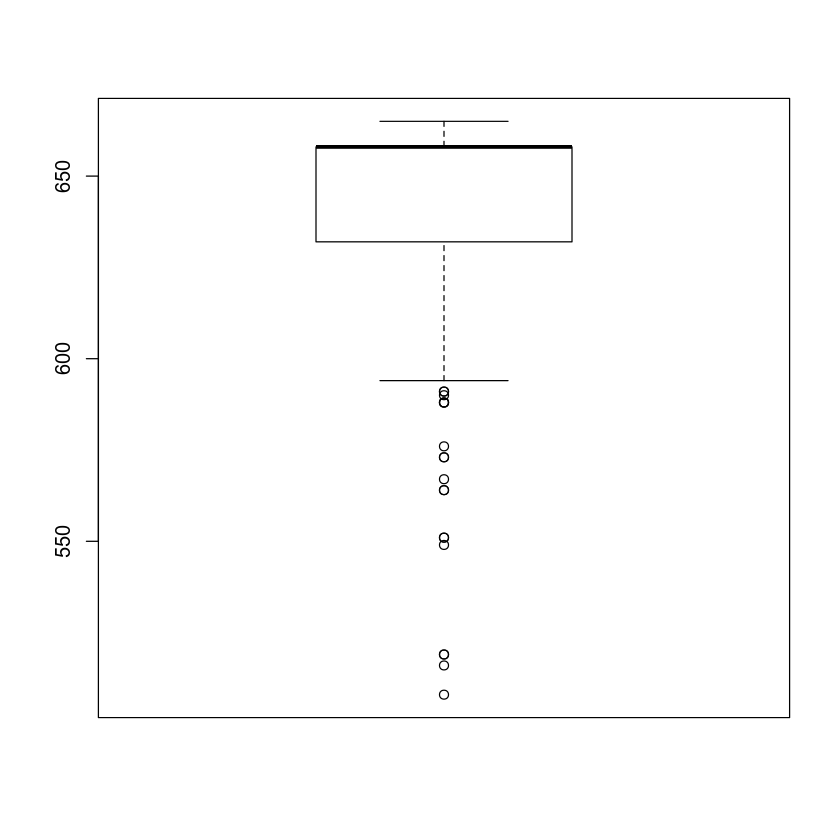

In [394]:
boxplot(COI_testb01_data$seqlen2)

In [405]:
COI_testb02_data <- COI_500to700_data[sample(nrow(COI_500to700_data), 100), ]

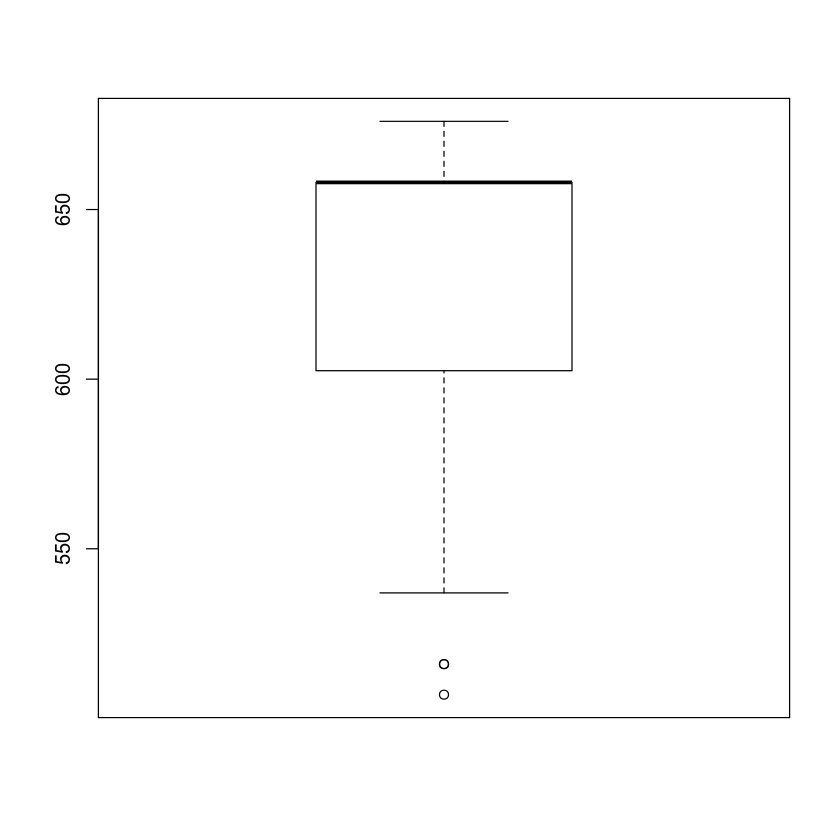

In [406]:
boxplot(COI_testb02_data$seqlen2)

In [411]:
COI_testb03_data <- COI_500to700_data[sample(nrow(COI_500to700_data), 100), ]

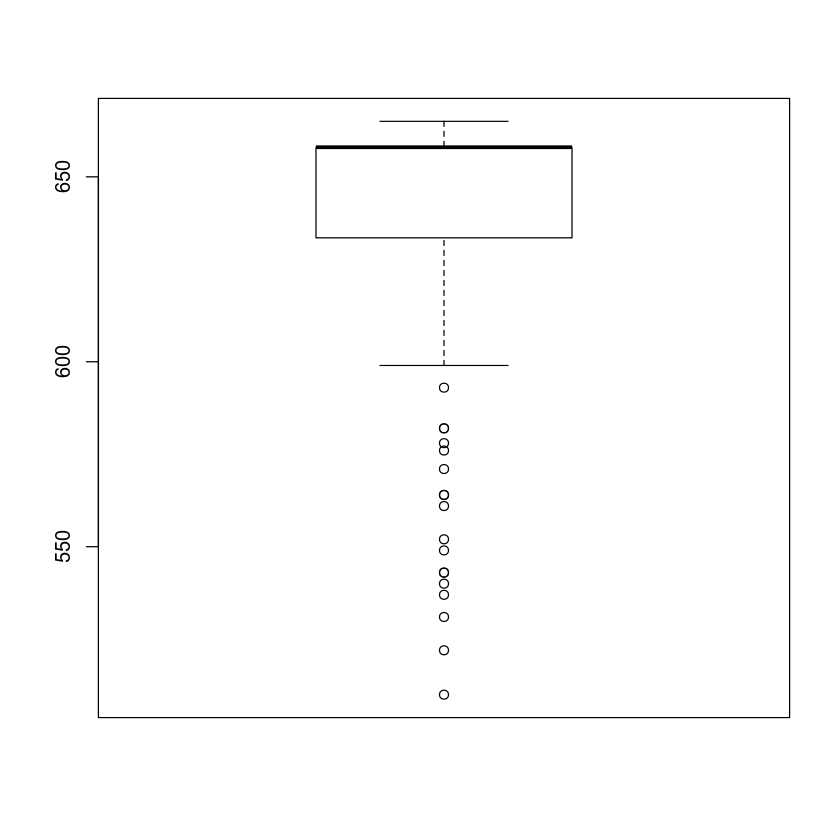

In [412]:
boxplot(COI_testb03_data$seqlen2)

**3. Sampling from insecta COI-5P data with 650 to 660 nucleotide sequence length**

In [440]:
COI_testc04_data <- COI_650to660_data[sample(nrow(COI_650to660_data), 100), ]

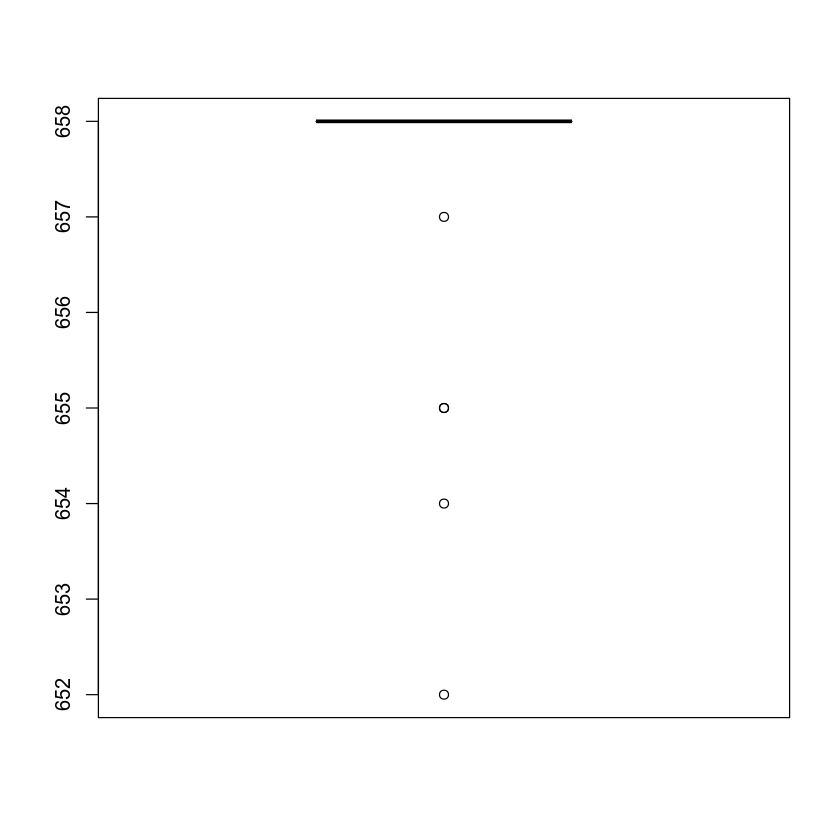

In [441]:
boxplot(COI_testc04_data$seqlen2)

In [464]:
COI_testc05_data <- COI_650to660_data[sample(nrow(COI_650to660_data), 100), ]

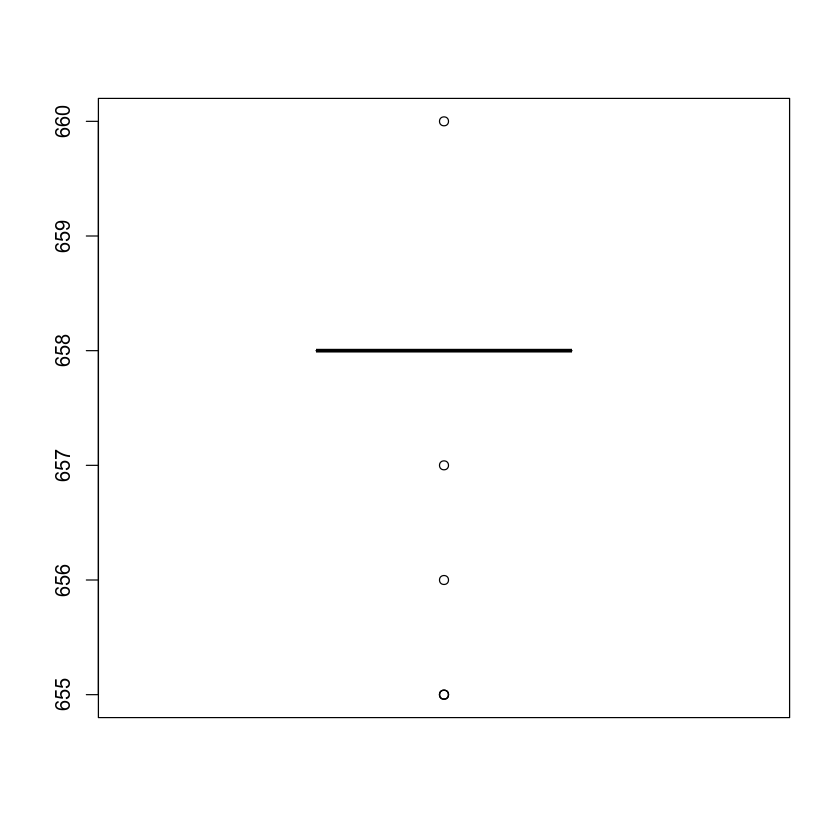

In [465]:
boxplot(COI_testc05_data$seqlen2)

**4. Sampling from insecta COI-5P data with under 500 nucleotide sequence length**

In [488]:
COI_testd06_data <- COI_Under500_data[sample(nrow(COI_Under500_data), 100), ]

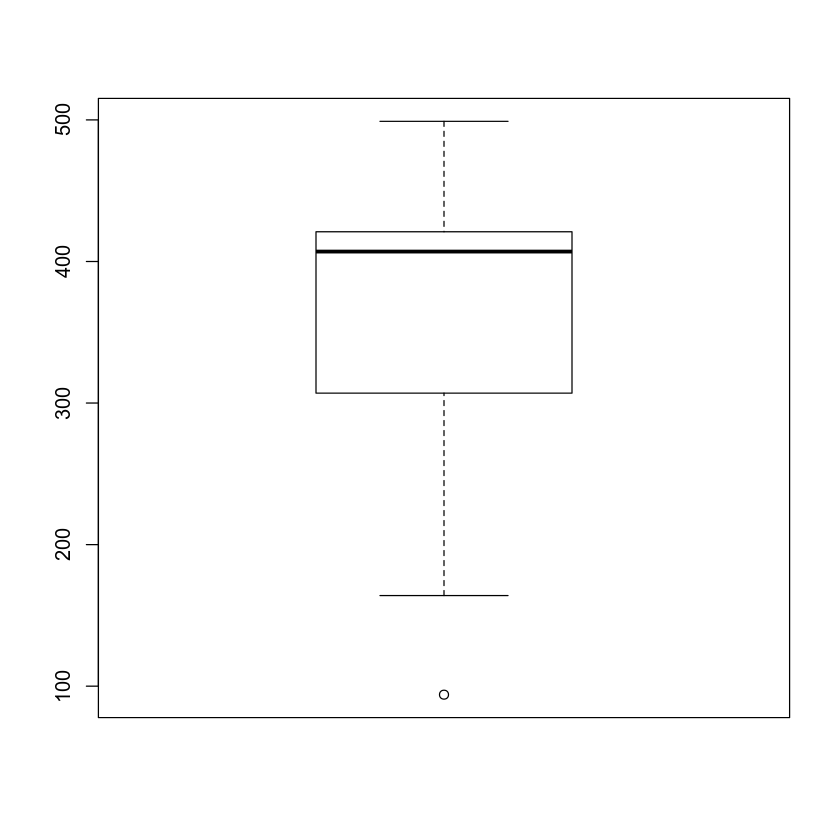

In [489]:
boxplot(COI_testd06_data$seqlen2)

**5. Sampling from insecta COI-5P data with over 700 nucleotide sequence length**

In [490]:
COI_teste07_data <- COI_Over700_data[sample(nrow(COI_Over700_data), 100), ]

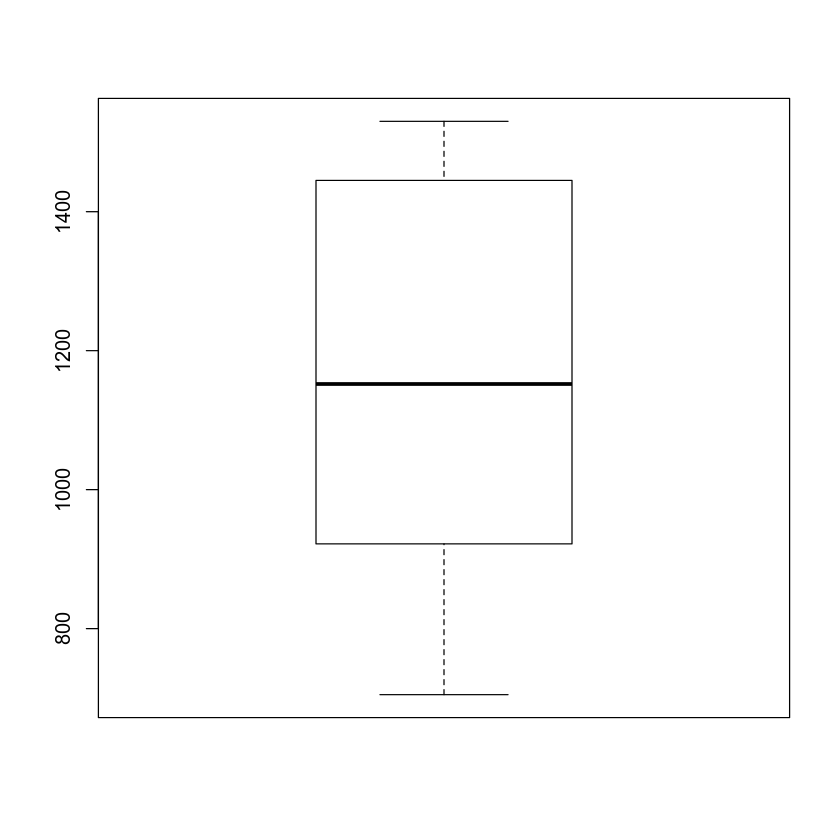

In [491]:
boxplot(COI_teste07_data$seqlen2)

In [107]:
ls()

[1] "arthropoda_data"      "arthropoda_data1"     "bold_data"           
 [4] "bold_dataframe"       "COI_500to700_data"    "COI_650to660_data"   
 [7] "COI_all_data"         "COI_data"             "COI_Insect_Afrodata" 
[10] "COI_Insect_data"      "COI_Insect_EAfrodata" "COI_Insecta_data"    
[13] "COI_Over499_data"     "COI_Over700_data"     "COI_Under500_data"   
[16] "Insecta_data"         "nonInsecta_data"      "resulting_dataframe1"
[19] "resulting_dataframe2" "resulting_dataframe3" "sample_data"         
[22] "sample_dataframe"

In [493]:
getwd()

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/code"

## **Saving final tidy copies of the data to** ***'/co1_metaanalysis/Data/input'*** **directory**

In [494]:
### Printing copies of the final tidy files
datalist = lapply(c("COI_all_data", "COI_Over499_data", "COI_500to700_data", "COI_650to660_data", "COI_Over700_data", "COI_Under500_data", "COI_testa00_data", "COI_testb01_data", "COI_testb02_data", "COI_testb03_data", "COI_testc04_data", "COI_testc05_data", "COI_testd06_data", "COI_teste07_data"), get)
names(datalist) <- (c("../data/input/test_data/COI_all_data", "../data/input/test_data/COI_Over499_data", "../data/input/test_data/COI_500to700_data", "../data/input/test_data/COI_650to660_data", "../data/input/test_data/COI_Over700_data", "../data/input/test_data/COI_Under500_data", "../data/input/test_data/COI_testa00_data", "../data/input/test_data/COI_testb01_data", "../data/input/test_data/COI_testb02_data", "../data/input/test_data/COI_testb03_data", "../data/input/test_data/COI_testc04_data", "../data/input/test_data/COI_testc05_data", "../data/input/test_data/COI_testd06_data", "../data/input/test_data/COI_teste07_data"))
for (i in 1:length(datalist)) {write.table(datalist[i], file = paste(names(datalist[i]), ".tsv", sep = ""), row.names = FALSE, col.names= TRUE, sep = "\t", quote=FALSE)}

In [43]:
length(which(is.na(COI_500to700_data$order_name)))

[1] 0